In [1]:
# Libraries imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
x0=10000             # For initializing the nonlinear optimization method

In [3]:
# Profit Function
def profit(capacity):
    #parameters
    unitrev = 3          # revenue per unit
    unitcost = .2        # cost per unit
    capacitycost = .4    # operating capacity costs
    demand = 50000       # initial demand
    growth = 1.05        # market growth rate
    periods = 10         # number of periods
    buildcost = 16       # building cost
    overallprofit=0      # overall profit
    
    #objective function
    for year in range (periods):
        yearlyprofit=((unitrev-unitcost)*min(demand*(growth)**year,capacity)-(capacitycost*capacity))
        overallprofit+=yearlyprofit
    overallprofit -= (capacity*buildcost)
    
    return -1*(overallprofit)

In [4]:
# Optimization Method                            
optimization = minimize(profit, x0, method='Nelder-Mead', options={'xtol': 1e-8, 'disp': False})

In [5]:
# Results Display
print ("Optimal Capacity:", str(optimization.x[0]),"Units")
print ("Expected Profit:", "$"+str(-1*profit(optimization.x[0])))

Optimal Capacity: 55125.0 Units
Expected Profit: $419300.0


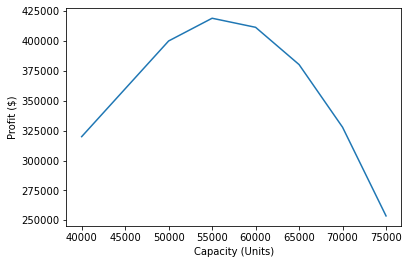

In [6]:
# Plot
r = [i for i in range(40000,80000,5000)]
plt.plot(r, [-profit(j) for j in r])
plt.xlabel('Capacity (Units)')
plt.ylabel('Profit ($)')
plt.show()